# TEST -- PYTHON USE CASE 1


**Dataset** : Annual Water Usage in Baltimore. 

You can download it here
[Water.csv](https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL)

The dataset is credited to Hipel an Mcleod, 1994.


**Background** : The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.
The values are in the units of liters per capita per day, and there are 79 observations.

**Objective** : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to predict annual water usage.

# Import Library

In [380]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import statsmodels
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# I. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).

In [381]:
df = pd.read_csv('water.csv', names=['Year','Water'],skiprows=(0,81))
df = df.set_index('Year')
series = pd.Series(df['Water'])
series.head(3)

Year
1885    356
1886    386
1887    397
Name: Water, dtype: int64

*** 
Kode diatas digunakan untuk mengubah dataset yang awalnya dataframe menjadi series
***

In [382]:
split_point = len(series) - 10
dataset = pd.DataFrame(series[0:split_point], columns=['Water'])
validation = pd.DataFrame(series[split_point:], columns=['Water'])
dataset.to_csv('dataset.csv', index=True)
validation.to_csv('validation.csv', index=True)

***
split point adalah titik potong untuk memisah dataset dan validation
<br> dataset adalah data dari series row pertama sampai row ke 11 dari belakang
<br> validation adalah data dari series 10 row terakhir
***

In [383]:
dataset.head(3)

,Water
Year,
1885,356
1886,386
1887,397


In [384]:
validation.head(3)

,Water
Year,
1954,568
1955,575
1956,579


# II. Create summary of the dataset, with python function.

In [385]:
series.describe()

count     79.000000
mean     512.025316
std       75.685072
min      344.000000
25%      462.000000
50%      503.000000
75%      581.000000
max      662.000000
Name: Water, dtype: float64

# III. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

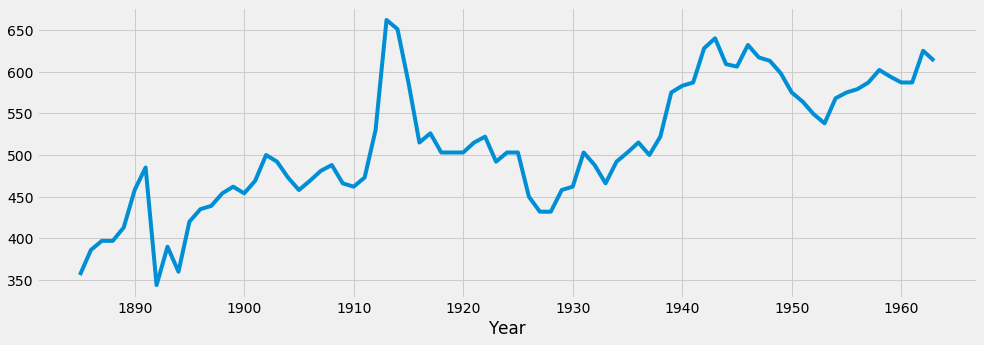

In [386]:
series.plot(figsize=(15, 5))
plt.show()

# IV. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [387]:
decade = series.groupby((series.index//10)*10).sum()
decade.head(3)

Year
1880    1949
1890    4247
1900    4750
Name: Water, dtype: int64

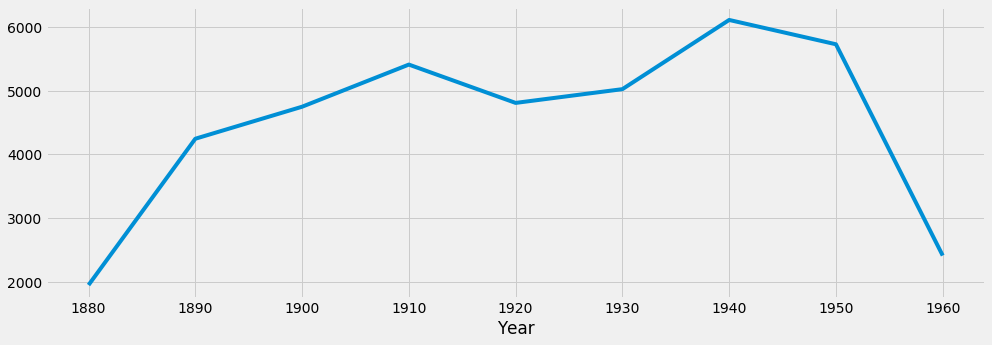

In [388]:
decade.plot(figsize=(15, 5))
plt.show()

# V. Create models using ARIMA
### I. Split the dataset into train and test sets directly
### II. The first 50% of the dataset will be held back to train the model.

In [389]:
dataset = dataset.values
dataset = dataset.astype('float32')
test_size=int(len(dataset)*0.51)
train, test = dataset[:test_size],dataset[test_size:]
print('Total train :',train.shape[0])

Total train : 35


### III. The remaining 50% of the dataset will be iterated and test the model.

In [390]:
print('Total test :',test.shape[0])

Total test : 34


### IV. The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

In [391]:
arima_order = (0,1,0)

### V. Use an ARIMA(0,1,0) on the raw data may be a good starting point.

In [392]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   34
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -176.424
Method:                           css   S.D. of innovations             43.380
Date:                Thu, 10 Oct 2019   AIC                            356.847
Time:                        16:00:24   BIC                            359.900
Sample:                             1   HQIC                           357.888
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3235      7.440      0.581      0.565     -10.258      18.905


In [393]:
from sklearn.metrics import mean_squared_error
from math import sqrt

fcast = arima_fit.forecast(steps=34)[0]
rmse = sqrt(mean_squared_error(test, fcast))
print('\nRMSE : ',rmse)


RMSE :  60.77349247446056


***
Pada model ini nilai rmse masih cukup tinggi yakni 60. semakin kecil nilai rmse maka semakin bagus model tersebut. tapi tidak boleh terlalu kecil karena bisa overvit.
***

# Visualisasi

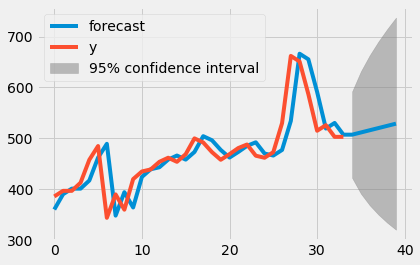

In [394]:
arima_fit.plot_predict(1,40,plot_insample=True)
x = arima_fit.forecast(steps=80)

***
Dari visualisasi diatas dapat dilihat bahwa model diatas yang rmse nya 60 sudah lumayan baik dalam mempredict. line merah adalah nilai sebenarnya. line biru adalah hasil prediksi dari model.
***

### VI. When model trained, a one-step prediction made ang the prediction stored for later evaluation.
### VII. The actual observation from the test dataset woll be added to the training dataset for the next iteration.
### VIII. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

In [395]:
history = [x for x in train]
prediction = []
for i in range(len(test)):
    #model predict  
    arima = ARIMA(history, order=(0,1,0))
    arima_fit = arima.fit(disp=0)
    fcast = arima_fit.forecast()[0]
    prediction.append(fcast)
    #observasi
    obs = test[i]
    history.append(obs)
    print('predicted = %.3f | expected=%.3f' % (fcast,obs))

predicted = 507.324 | expected=503.000
predicted = 507.200 | expected=515.000
predicted = 519.417 | expected=522.000
predicted = 526.486 | expected=492.000
predicted = 495.579 | expected=503.000
predicted = 506.769 | expected=503.000
predicted = 506.675 | expected=450.000
predicted = 452.293 | expected=432.000
predicted = 433.810 | expected=432.000
predicted = 433.767 | expected=458.000
predicted = 460.318 | expected=462.000
predicted = 464.356 | expected=503.000
predicted = 506.196 | expected=488.000
predicted = 490.809 | expected=466.000
predicted = 468.292 | expected=492.000
predicted = 494.776 | expected=503.000
predicted = 505.940 | expected=515.000
predicted = 518.118 | expected=500.000
predicted = 502.769 | expected=522.000
predicted = 525.132 | expected=575.000
predicted = 579.056 | expected=583.000
predicted = 587.127 | expected=587.000
predicted = 591.125 | expected=628.000
predicted = 632.772 | expected=640.000
predicted = 644.897 | expected=609.000
predicted = 613.288 | exp

***
Model akan memprediksi hasil selanjutnya. kemudian data selanjutnya akan dimasukkan kedalam model dan membuatnya menjadi model baru. kemudian model tersebut digunakan untuk memprediksi hasil selanjutnya lagi. dan begitu seterusnya sampai semua ahsil ter prediksi.
***

# Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
### I. Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

In [396]:
rmse = sqrt(mean_squared_error(test, prediction))
print('\nRMSE : ',rmse)


RMSE :  22.624199508937128


***
Model yang terbaru ini rmse nya lebih kecil dari model awal. ini berarti model ini lebih baik dari model awal
***

# Visualisasi

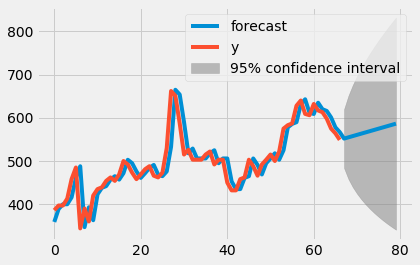

In [397]:
arima_fit.plot_predict(1,80,plot_insample=True)
x = arima_fit.forecast(steps=80)

### Plot residual

Text(0.5,1,'DISTPLOT AGE')

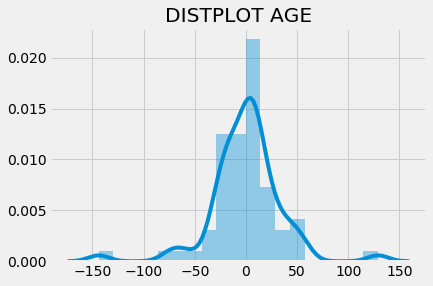

In [398]:
import seaborn as sns
sns.distplot(arima_fit.resid).set_title('DISTPLOT AGE')

***
Pada plot residual tersebut dapat dilihat bahwa model ini sudah cukup baik karena plotnya seimbang
***

# Conclussion : 
Tujuan case ini adalah **prediksi annual water usage**. Pada Case ini diminta menggunakan Arima dengan nilai order(0,1,0). Arima dengan order **(0,1,0)** dengan menggunakan lebih banyak dataset menghasilkan **RMSE : 22,6** dan itu sudah cukup bagus dilihat dari hasil visualisasi. Arima yang bagus datanya harus stationer, residual harus menebar normal, ragam dari residual harus homogen